In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("K Means Dataset - Mall_Customers (1).csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X =df.iloc[:,[3,4]].values   ##Numpy array, rather than taking pandas dataframe we have taken numpy array all rows & 3 and 4 cloumns

In [7]:
#### How much cluster we will consider for the computation?
###Elbow method - To choose the optimal number of cluster, but in hierarchial clustering we will use dendogram to choose
###the number of clusters

In [12]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

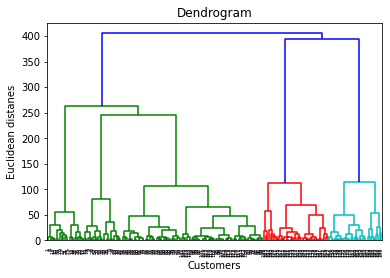

In [14]:
### This is basically to choose the number of clusters.
dendogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distanes')
plt.show()

In [15]:
# Ward method is actually a method that tries to minimize the variance
# within each cluster. In K-means when we were trying to minimize the wcss
# to plot our elbow method chart, here it's almost the same the only difference 
# is that instead of minimizing wcss we are minimizing the within-cluster variants.

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'single') ## linakge ward minimize the variance of each cluister,  single for minimum, complete for maximum.

In [23]:
y_hc = hc.fit_predict(X)

In [24]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 4, 0, 4,
       3, 2])

In [33]:
hc.n_clusters,hc.distance_threshold

(5, None)

In [28]:
df1 = pd.DataFrame({'Customer_ID' : df['CustomerID'],'cluster' : y_hc,'Annual Income (k$)': df['Annual Income (k$)'], 'Spending Score (1-100)': df['Spending Score (1-100)']} )

In [29]:
df1

,Customer_ID,cluster,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,1,16,6
3,4,1,16,77
4,5,1,17,40
...,...,...,...,...
195,196,4,120,79
196,197,0,126,28
197,198,4,126,74
198,199,3,137,18


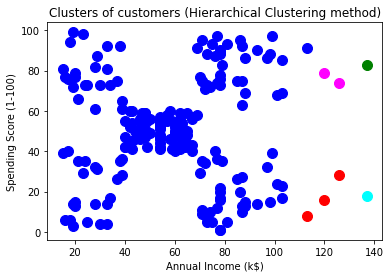

In [37]:
### Visualizing the Clusters
plt.scatter(X[y_hc == 0,0], X[y_hc ==0,1], s= 100, c = 'red', label ='Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc ==1,1], s= 100, c = 'blue', label ='Cluster 2')
plt.scatter(X[y_hc == 2,0], X[y_hc ==2,1], s= 100, c = 'green', label ='Cluster 3')
plt.scatter(X[y_hc == 3,0], X[y_hc ==3,1], s= 100, c = 'cyan', label ='Cluster 4')
plt.scatter(X[y_hc == 4,0], X[y_hc ==4,1], s= 100, c = 'magenta', label ='Cluster 5')
plt.title('Clusters of customers (Hierarchical Clustering method)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [41]:
df1[df1.cluster ==1]

,Customer_ID,cluster,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,1,16,6
3,4,1,16,77
4,5,1,17,40
...,...,...,...,...
188,189,1,103,17
189,190,1,103,85
190,191,1,103,23
191,192,1,103,69
